In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1) Dataset artificiel
X, y = make_classification(n_samples=1000,
                           n_features=20,
                           n_classes=2,
                           random_state=42)

# Normalisation
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2) Construire un deep neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(20,)),   # couche cachée 1
    Dense(32, activation='relu'),                      # couche cachée 2
    Dense(16, activation='relu'),                      # couche cachée 3
    Dense(1, activation='sigmoid')                     # sortie (binaire)
])

# 3) Compiler le modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 4) Entraîner le modèle
# Historique d'entraînement
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)
# 5) Évaluer
loss, acc = model.evaluate(X_test, y_test)

print("Accuracy :", acc)


Epoch 1/20


/Users/ikram/miniconda3/envs/tf-arm/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5422 - loss: 0.6896 - val_accuracy: 0.7000 - val_loss: 0.6333
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7469 - loss: 0.5814 - val_accuracy: 0.8375 - val_loss: 0.5233
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8109 - loss: 0.4777 - val_accuracy: 0.8625 - val_loss: 0.4122
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8516 - loss: 0.3895 - val_accuracy: 0.8813 - val_loss: 0.3276
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8687 - loss: 0.3369 - val_accuracy: 0.8813 - val_loss: 0.2866
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8875 - loss: 0.3067 - val_accuracy: 0.8687 - val_loss: 0.2760
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8781 - loss: 0.2902 - val_accuracy: 0.8750 - val_loss: 0.2743
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9000 - loss: 0.2728 - val_accuracy: 0.8687 - val_loss: 0.2697
Epo

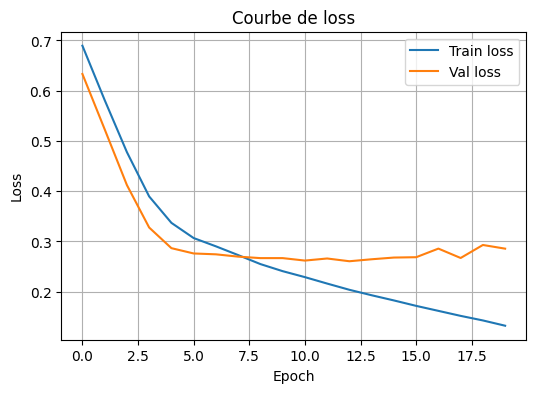

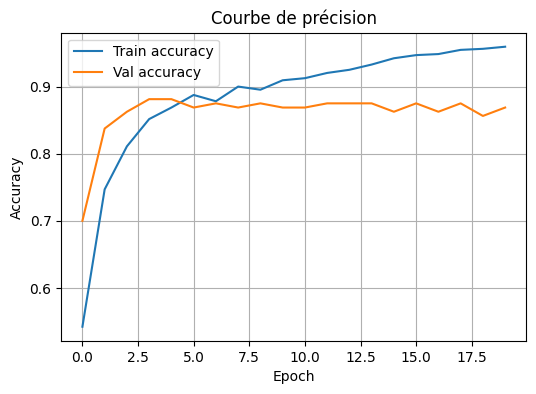

In [3]:
import matplotlib.pyplot as plt



# ----- GRAPHE LOSS -----
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de loss')
plt.legend()
plt.grid(True)
plt.show()

# ----- GRAPHE ACCURACY -----
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Courbe de précision')
plt.legend()
plt.grid(True)
plt.show()


1) Courbe de loss
Ce que tu observes

🔵 Train loss ↓ de façon continue

🟠 Val loss ↓ au début puis stagne / remonte légèrement à partir de ~6–8 epochs

Interprétation

👉 Le modèle apprend très bien le train
👉 Mais commence à sur-apprendre après quelques epochs
2) Courbe de précision (accuracy)
Ce que tu observes

🔵 Train accuracy ↑ jusqu’à ~95 %

🟠 Val accuracy ↑ rapidement puis plafonne vers ~87–88 %

Interprétation

👉 Le réseau mémorise le train
👉 Les performances sur données jamais vues n’augmentent plus

📌 Encore un indice d’overfitting

🔹 3) Epoch optimale 🎯

Meilleur compromis vers epoch 5–7

Après → le modèle devient trop spécifique au train

👉 Tu entraînes trop longtemps